# HarvardX_MITx_Person_Course_Dataset_Exploration
## by Ray Wong

## Preliminary Wrangling

The dataset we are using, is named 'HMXPC13_DI_v2_5-14-14.csv', which is de-identified data from the first year (Academic Year 2013: Fall 2012, Spring 2013, and Summer 2013) of MITx and HarvardX courses on the edX platform along with related documentation.

These data are aggregate records, and each record represents one individual's activity in one edX course.  

The data description can be found in file 'Person+Course+Documentation.pdf', for better understanding of each variable, I also put the description of each variable into a spreadsheet(named 'HMX Data description.xlsx') with some comments.

The dataset and documents are available on link below:

[dataverse.harvard.edu](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/26147)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load data into a pandas dataframe and check the first 5 rows
df = pd.read_csv('HMXPC13_DI_v2_5-14-14.csv')
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


### Assessing  Data

In [3]:
# dataset size
df.shape

(641138, 20)

There are 641138 records in our dataset, with 20 variables.

In [4]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 20 columns):
course_id            641138 non-null object
userid_DI            641138 non-null object
registered           641138 non-null int64
viewed               641138 non-null int64
explored             641138 non-null int64
certified            641138 non-null int64
final_cc_cname_DI    641138 non-null object
LoE_DI               535130 non-null object
YoB                  544533 non-null float64
gender               554332 non-null object
grade                592766 non-null object
start_time_DI        641138 non-null object
last_event_DI        462184 non-null object
nevents              441987 non-null float64
ndays_act            478395 non-null float64
nplay_video          183608 non-null float64
nchapters            382385 non-null float64
nforum_posts         641138 non-null int64
roles                0 non-null float64
incomplete_flag      100161 non-null float64
dtypes: floa

Through the basic info. of the dataset, we found that:
- There are so many missing values in the dataset, we will need to look deeper into the missing values to figure out how to handle them
- Most of the variable types looks good, but the type of 'grade' is object, while float would be more reasonable， 'YoB', 'nevents', 'ndays_act', 'nplay_video' and 'nchapters' are floating, we need to convert them to int.

In [5]:
# check duplicate
df.duplicated().sum()

0

No duplicated record, which is good.

Next we will check the description of the numerical variabls in our dataset

In [6]:
# description of the dataset
df.describe()

,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,641138.0,641138.000000,641138.000000,641138.000000,544533.000000,441987.000000,478395.000000,183608.000000,382385.000000,641138.000000,0.0,100161.0
mean,1.0,0.624299,0.061899,0.027587,1985.253279,431.008018,5.710254,114.844173,3.634423,0.018968,NaN,1.0
std,0.0,0.484304,0.240973,0.163786,8.891814,1516.116057,11.866471,426.996844,4.490987,0.229539,NaN,0.0
min,1.0,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.0
25%,1.0,0.000000,0.000000,0.000000,1982.000000,3.000000,1.000000,5.000000,1.000000,0.000000,NaN,1.0
50%,1.0,1.000000,0.000000,0.000000,1988.000000,24.000000,2.000000,18.000000,2.000000,0.000000,NaN,1.0
75%,1.0,1.000000,0.000000,0.000000,1991.000000,158.000000,4.000000,73.000000,4.000000,0.000000,NaN,1.0
max,1.0,1.000000,1.000000,1.000000,2013.000000,197757.000000,205.000000,98517.000000,48.000000,20.000000,NaN,1.0


- Since all the values of variable 'registered' is 1, it makes no difference to our analysis, we will just drop this variable. 

- The min. values of variables 'nevents', 'ndays_act',	'nplay_video',	'nchapters' are 1 instead of 0. Actually this is not the case, since per data description,  the variable 'nevents' are left blank if no interactions beyond registration. We will fill the NA with 0, and see what the other variables will look like.

- Seems like there is no value in variable 'roles', we will take care of it when we deal with missing values
- max value of year of birth(variable 'YoB') is 2013, this could not be true, we need to look deep into the values to filter out the unreliable ones

In [7]:
df[df.YoB>2000].YoB.value_counts()

2012.0    472
2001.0    142
2013.0     61
2002.0     45
2011.0     34
2010.0     17
2003.0     10
2008.0     10
2009.0      8
2007.0      6
Name: YoB, dtype: int64

There are really a bunch of unreliable values in this YoB variable. This Wikipedia page[Education in the United States](https://en.wikipedia.org/wiki/Education_in_the_United_States) provides ages of US students go to different schools. Suppose at least elementary school graduates are applicable to study those online courses, then their ages would be 9-10 years old. Based on this, we will filter out those whose Yob is later than 2003.

We will also check the values of other variables, just to make sure they make sense.

In [8]:
df.viewed.value_counts()

1    400262
0    240876
Name: viewed, dtype: int64

In [9]:
df.explored.value_counts()

0    601452
1     39686
Name: explored, dtype: int64

In [10]:
df.certified.value_counts()

0    623451
1     17687
Name: certified, dtype: int64

These three numerical variables above looks good, though there are some missing values, we will handle that later.

In [11]:
df.final_cc_cname_DI.value_counts()

United States                             184240
India                                      88696
Unknown/Other                              82029
Other Europe                               40377
Other Africa                               23897
United Kingdom                             22131
Brazil                                     17856
Other Middle East/Central Asia             17325
Other South Asia                           12992
Canada                                     12738
Pakistan                                   10824
Russian Federation                         10432
Spain                                      10003
Other South America                         9916
Egypt                                       9286
Germany                                     8074
Nigeria                                     7483
Other East Asia                             6446
Australia                                   6419
Mexico                                      5638
Philippines         

Categorical variables **'final_cc_cname_DI'** also looks good.

In [12]:
df.LoE_DI.value_counts()

Bachelor's             219768
Secondary              169694
Master's               118189
Less than Secondary     14092
Doctorate               13387
Name: LoE_DI, dtype: int64

In [13]:
df.gender.value_counts()

m    411520
f    142795
o        17
Name: gender, dtype: int64

user-provided variables **'LoE', 'YoB' and 'gender'**, the missing values should be just simply because the user did not provide the info. There is not much we can about it, we will consider dropping those records with missing values.

In [14]:
df.grade.value_counts()

0       490868
0.01     19891
0.0      18525
          9028
0.02      5417
0.03      4769
0.04      3912
0.05      2238
0.06      2203
1         2010
0.07      1330
0.09      1293
0.08      1069
0.1        817
0.13       753
0.11       705
0.12       680
0.89       586
0.91       575
0.93       551
0.15       547
0.88       545
0.9        541
0.96       535
0.14       518
0.87       507
0.97       504
0.92       502
0.99       502
0.94       497
         ...  
0.61       250
0.65       250
0.34       249
0.6        238
0.38       226
0.39       226
0.4        217
0.36       214
0.37       213
0.35       208
0.42       184
0.56       182
0.45       174
0.57       174
0.55       173
0.46       170
0.5        170
0.53       167
0.59       165
0.51       160
0.43       157
0.47       155
0.41       155
0.58       153
0.44       149
0.54       145
0.52       142
0.48       139
0.49       118
1.01         6
Name: grade, Length: 104, dtype: int64

Something interesting here. The range of grade values is from 0 to 1, however, we found some 1.01 values there, and there is a 0 value while there is also a 0.0 value,And seems like there are some values which are just spaces, but they are not shown as NA.

In [15]:
# check values of incomplete_flag variable
df.incomplete_flag.value_counts()

1.0    100161
Name: incomplete_flag, dtype: int64

According to the data description in file 'Person+Course+Documentation.pdf', the variable **'incomplete_flag'** identifies the records which are internally inconsistent, to assure the reliability of the analysis, we would prefer filter those records without a inconsistent problem, which is to say, the value of incomplete_flag != 1. Then we will drop this variable since it is no longer of any importance.

**Based on the exploration above, what we need to do to handle the data includes:**
- Filter to get a subset without inconsistent records
- Drop column 'registered'
- Filter out the unreliable YoB values
- Process missing values
- For variable 'grade', drop the unreliable values, drop the values in blank, then convert the data type from object type to numerical type, the 0 nad 0.0 should not be a problem any more after we convert the variable to numerical type since they would be the same






### Cleaning Data

#### Subset

Filter to get a subset without inconsistent records, which is to say, the value of variable incomplete_flag != 1

In [16]:
df = df[df.incomplete_flag != 1]
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
5,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,1,0,United States,NaN,NaN,NaN,0,2012-09-17,2013-05-23,502.0,16.0,50.0,12.0,0,NaN,NaN
7,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,0,2013-01-01,2013-05-14,42.0,6.0,NaN,3.0,0,NaN,NaN
8,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2013-02-18,2013-03-17,70.0,3.0,NaN,3.0,0,NaN,NaN
10,HarvardX/ER22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2013-02-23,2013-06-14,17.0,2.0,NaN,2.0,0,NaN,NaN
11,HarvardX/ER22x/2013_Spring,MHxPC130198098,1,1,0,0,United States,NaN,NaN,NaN,0,2013-06-17,2013-06-17,32.0,1.0,NaN,3.0,0,NaN,NaN


In [17]:
df.incomplete_flag.value_counts()

Series([], Name: incomplete_flag, dtype: int64)

Drop the incomplete_flag column and registered column

In [18]:
df.drop(['incomplete_flag', 'registered'], axis=1,inplace=True)
df.head()

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles
5,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,0,United States,NaN,NaN,NaN,0,2012-09-17,2013-05-23,502.0,16.0,50.0,12.0,0,NaN
7,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,0,0,France,NaN,NaN,NaN,0,2013-01-01,2013-05-14,42.0,6.0,NaN,3.0,0,NaN
8,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,2013-02-18,2013-03-17,70.0,3.0,NaN,3.0,0,NaN
10,HarvardX/ER22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,2013-02-23,2013-06-14,17.0,2.0,NaN,2.0,0,NaN
11,HarvardX/ER22x/2013_Spring,MHxPC130198098,1,0,0,United States,NaN,NaN,NaN,0,2013-06-17,2013-06-17,32.0,1.0,NaN,3.0,0,NaN


#### Missing Values

In [19]:
# missing values by column
df.isna().sum()

course_id                 0
userid_DI                 0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI                89002
YoB                   82147
gender                73813
grade                 43956
start_time_DI             0
last_event_DI         93353
nevents               98990
ndays_act             98990
nplay_video          359365
nchapters            231160
nforum_posts              0
roles                540977
dtype: int64

Besides missing value number of each variable, we will also pull out the proportion of missing values for each variable.

In [20]:
# proportion of missing values by rows
df.isna().sum() / df.shape[0]

course_id            0.000000
userid_DI            0.000000
viewed               0.000000
explored             0.000000
certified            0.000000
final_cc_cname_DI    0.000000
LoE_DI               0.164521
YoB                  0.151849
gender               0.136444
grade                0.081253
start_time_DI        0.000000
last_event_DI        0.172564
nevents              0.182984
ndays_act            0.182984
nplay_video          0.664289
nchapters            0.427301
nforum_posts         0.000000
roles                1.000000
dtype: float64

Insights of missing values:
- The variable 'role' has 100% value misisng. According to the data description, this variable is to identify staff and instructors, but then they are removed from the released, so the whole variable is blank, since this variable is no longer important to us, we will just drop it.
- Many variables have 10-20% missing values, we will go over each variable to see what we can do about it.
- Some variables like nplay_video, nchapters have more than 40% values missing, we may want to be careful when handling these variables since missing values may represent something, we will figure it out.


In [21]:
# drop 'roles' column
df.drop(['roles'],  axis=1, inplace=True)
df.head()

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
5,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,0,United States,NaN,NaN,NaN,0,2012-09-17,2013-05-23,502.0,16.0,50.0,12.0,0
7,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,0,0,France,NaN,NaN,NaN,0,2013-01-01,2013-05-14,42.0,6.0,NaN,3.0,0
8,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,2013-02-18,2013-03-17,70.0,3.0,NaN,3.0,0
10,HarvardX/ER22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,2013-02-23,2013-06-14,17.0,2.0,NaN,2.0,0
11,HarvardX/ER22x/2013_Spring,MHxPC130198098,1,0,0,United States,NaN,NaN,NaN,0,2013-06-17,2013-06-17,32.0,1.0,NaN,3.0,0


Drop missing values in variables 'LoE_DI', 'YoB' and 'gender'.

In [22]:
# drop rows with missing values for column 'LoE_DI', 'gender', 'grade'
df.dropna(subset=['LoE_DI', 'YoB', 'gender'],inplace=True)
df.isna().sum()

course_id                 0
userid_DI                 0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI                    0
YoB                       0
gender                    0
grade                 37182
start_time_DI             0
last_event_DI         80498
nevents               85215
ndays_act             85215
nplay_video          302773
nchapters            196680
nforum_posts              0
dtype: int64

As checked earlier, there is 0 values in variable 'grade', so the NA should not be 0s, we will drop the missing values in variable 'grade'.

In [23]:
df.dropna(subset=['grade'], inplace=True)
df.isna().sum()

course_id                 0
userid_DI                 0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI                    0
YoB                       0
gender                    0
grade                     0
start_time_DI             0
last_event_DI         75729
nevents               79939
ndays_act             79939
nplay_video          278138
nchapters            180937
nforum_posts              0
dtype: int64

Per data description, both values of variables 'last_event_DI' and nevents would be left blank if no interactions beyond registration, so this is how the missing values in these two variables come from, **but one thing we do not know yet is why where are 75729 missing values in variable last_event_DI while there are 79939 in variable 'nevents'**, for now, we will just:
- fill the NAs with 0s for variable nevent
- fill the NAs with the start_time_DI for variable last_event_DI, this makes sense since in one does not interact with the course, his last event date would be his start time date, which is to say, he survived 0 days.
- variable ndays_act is missing the same amount of values as nevents, we have reason to believe that this missing value also represent no interaction. We will also fill the NAs with 0s for this variable

In [24]:
df.nevents = df.nevents.fillna(0)
df.ndays_act = df.ndays_act.fillna(0)

In [25]:
df[df.nevents == '0.0'].ndays_act.value_counts()

/Library/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: ndays_act, dtype: int64)

In [26]:
df.isna().sum()

course_id                 0
userid_DI                 0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI                    0
YoB                       0
gender                    0
grade                     0
start_time_DI             0
last_event_DI         75729
nevents                   0
ndays_act                 0
nplay_video          278138
nchapters            180937
nforum_posts              0
dtype: int64

Looks good, the 79939 0s in variable ndays_act exactly correspond to the 79939 0s in variable nevents

Next we will fill the NAs with the start_time_DI for variable last_event_DI

In [27]:
df['last_event_DI'].fillna(df['start_time_DI'], inplace=True)

In [28]:
df.isna().sum()

course_id                 0
userid_DI                 0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI                    0
YoB                       0
gender                    0
grade                     0
start_time_DI             0
last_event_DI             0
nevents                   0
ndays_act                 0
nplay_video          278138
nchapters            180937
nforum_posts              0
dtype: int64

For the last two variables with missing values, we know where nevents is 0, the values of these two variables should be 0, too. But what we are not sure about the other missing values. Whether they are also 0 or represent something else. Before we get any further confirmation from the dataset provider, we will just take them as 0. Then what we are going to do with these 2 variables would be fill NA with 0.

In [29]:
df.nplay_video = df.nplay_video.fillna(0)
df.nchapters = df.nchapters.fillna(0)

In [30]:
df.isna().sum()

course_id            0
userid_DI            0
viewed               0
explored             0
certified            0
final_cc_cname_DI    0
LoE_DI               0
YoB                  0
gender               0
grade                0
start_time_DI        0
last_event_DI        0
nevents              0
ndays_act            0
nplay_video          0
nchapters            0
nforum_posts         0
dtype: int64

#### Data Type

For 'grade' variable, first replace 0.0 with 0, then Convert variable 'grade' from object type to numerical type

In [31]:
# records with the grade value in blank
df[df.grade == ' ']

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
19455,HarvardX/CS50x/2012,MHxPC130543718,1,0,0,Other South Asia,Bachelor's,1976.0,f,,2012-07-24,2013-03-28,1.0,1.0,0.0,2.0,0
19561,HarvardX/CS50x/2012,MHxPC130475386,1,0,0,Greece,Bachelor's,1992.0,m,,2012-07-24,2013-02-13,8.0,2.0,0.0,2.0,0
19647,HarvardX/CB22x/2013_Spring,MHxPC130126585,1,0,0,Bangladesh,Secondary,1992.0,m,,2013-04-09,2013-04-09,23.0,1.0,0.0,2.0,0
19863,HarvardX/ER22x/2013_Spring,MHxPC130563436,1,0,0,Colombia,Master's,1986.0,m,,2012-12-20,2013-03-12,35.0,1.0,0.0,3.0,0
20775,HarvardX/CS50x/2012,MHxPC130483451,0,0,0,Unknown/Other,Master's,1960.0,f,,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0
20946,HarvardX/CS50x/2012,MHxPC130353078,0,0,0,Unknown/Other,Master's,1964.0,f,,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0
20956,HarvardX/CS50x/2012,MHxPC130280608,0,0,0,Egypt,Bachelor's,1976.0,m,,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0
21640,HarvardX/PH207x/2012_Fall,MHxPC130425156,0,0,0,Unknown/Other,Master's,1978.0,f,,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0
21891,HarvardX/CS50x/2012,MHxPC130419239,0,0,0,Canada,Bachelor's,1971.0,f,,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0
21956,HarvardX/CS50x/2012,MHxPC130410828,1,0,0,United States,Master's,1948.0,f,,2012-07-24,2013-02-15,3.0,1.0,0.0,1.0,0


In [32]:
# drop records of grade values in blank
df = df[df.grade != ' ']
df.grade.value_counts()

0       331485
0.01     15574
0.0      13526
0.02      4235
0.03      3620
0.04      3186
0.05      1787
0.06      1675
1         1604
0.07      1055
0.09      1014
0.08       834
0.1        630
0.13       606
0.12       547
0.11       542
0.89       461
0.88       436
0.91       435
0.9        419
0.15       408
0.14       405
0.93       400
0.96       393
0.94       388
0.87       388
0.86       386
0.97       377
0.16       374
0.92       364
         ...  
0.34       191
0.61       190
0.63       189
0.65       189
0.6        186
0.38       184
0.4        180
0.37       172
0.36       169
0.35       168
0.56       145
0.42       145
0.57       141
0.46       141
0.45       140
0.55       139
0.5        135
0.59       128
0.51       126
0.47       125
0.53       124
0.41       123
0.43       122
0.58       117
0.54       115
0.52       114
0.44       108
0.48       104
0.49        92
1.01         5
Name: grade, Length: 103, dtype: int64

In [33]:
# drop unreliable values where the value is 1.01
df = df[df.grade != '1.01']

In [34]:
# Convert variable 'grade' from object type to numerical type
df['grade'] = pd.to_numeric(df.grade)

In [35]:
df.grade.value_counts()

0.00    345011
0.01     15574
0.02      4235
0.03      3620
0.04      3186
0.05      1787
0.06      1675
1.00      1604
0.07      1055
0.09      1014
0.08       834
0.10       630
0.13       606
0.12       547
0.11       542
0.89       461
0.88       436
0.91       435
0.90       419
0.15       408
0.14       405
0.93       400
0.96       393
0.87       388
0.94       388
0.86       386
0.97       377
0.16       374
0.92       364
0.99       361
         ...  
0.39       192
0.34       191
0.61       190
0.65       189
0.63       189
0.60       186
0.38       184
0.40       180
0.37       172
0.36       169
0.35       168
0.56       145
0.42       145
0.57       141
0.46       141
0.45       140
0.55       139
0.50       135
0.59       128
0.51       126
0.47       125
0.53       124
0.41       123
0.43       122
0.58       117
0.54       115
0.52       114
0.44       108
0.48       104
0.49        92
Name: grade, Length: 101, dtype: int64

In [36]:
df.grade.describe()

count    403124.000000
mean          0.038242
std           0.159782
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: grade, dtype: float64

After cleaning, the min of grade is 0 and the max is 1, looks good

In [37]:
# convert 'YoB', 'nevents', 'ndays_act', 'nplay_video' and 'nplay_video'  to int
df['YoB'] = df['YoB'].astype('int')
df['nevents'] = df['nevents'].astype(int)
df['ndays_act'] = df['ndays_act'].astype(int)
df['nplay_video'] = df['nplay_video'].astype(int)
df['nchapters'] = df['nchapters'].astype(int)

In [38]:
df.dtypes

course_id             object
userid_DI             object
viewed                 int64
explored               int64
certified              int64
final_cc_cname_DI     object
LoE_DI                object
YoB                    int64
gender                object
grade                float64
start_time_DI         object
last_event_DI         object
nevents                int64
ndays_act              int64
nplay_video            int64
nchapters              int64
nforum_posts           int64
dtype: object

We  will save te cleaned dataset to 'hmx_cleaned.csv' for exploration later.

In [39]:
df.to_csv('hmx_cleaned.csv', index=False)

### Reloading and Accessing Data

In [40]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [41]:
hmx = pd.read_csv('hmx_cleaned.csv')
hmx.head()

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130288276,0,0,0,United States,Secondary,2012,m,0.0,2013-08-30,2013-08-30,0,0,0,0,0
1,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,1987,m,0.0,2012-07-24,2012-07-24,0,0,0,0,0
2,HarvardX/CS50x/2012,MHxPC130407931,0,0,0,United States,Secondary,1968,f,0.0,2012-07-24,2012-07-24,0,0,0,0,0
3,HarvardX/PH207x/2012_Fall,MHxPC130313697,0,0,0,India,Bachelor's,1989,m,0.0,2012-07-24,2013-07-27,6,3,0,0,0
4,HarvardX/CS50x/2012,MHxPC130064950,0,0,0,Unknown/Other,Master's,1978,m,0.0,2012-07-24,2012-07-24,0,0,0,0,0


In [42]:
print(hmx.shape)
print('\n')
print(hmx.info())
print('\n')
print(hmx.describe())

(403124, 17)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403124 entries, 0 to 403123
Data columns (total 17 columns):
course_id            403124 non-null object
userid_DI            403124 non-null object
viewed               403124 non-null int64
explored             403124 non-null int64
certified            403124 non-null int64
final_cc_cname_DI    403124 non-null object
LoE_DI               403124 non-null object
YoB                  403124 non-null int64
gender               403124 non-null object
grade                403124 non-null float64
start_time_DI        403124 non-null object
last_event_DI        403124 non-null object
nevents              403124 non-null int64
ndays_act            403124 non-null int64
nplay_video          403124 non-null int64
nchapters            403124 non-null int64
nforum_posts         403124 non-null int64
dtypes: float64(1), int64(9), object(7)
memory usage: 52.3+ MB
None


              viewed       explored      certified            Yo

### What is the structure of your dataset?
The cleaned dataset has 402756 records with 17 variables. Among these 17 variables, 1 are float type, 9 are int type, the other 7 are object type.

### What is/are the main feature(s) of interest in your dataset?

The feature of interest are 'certified' and 'grade'
- certified, represent whether or not a student earns a certificate
- grade, is the final grade the student gets from the course, ranges from 0 to 1.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I assume features below would support the investigation into 'certified' and 'grade':
- demographic variables: including age(variable 'YoB'), gender(variable 'gender'), country('final_cc_cname_DI'), level of eduction(variable 'LoE_DI')
- student activities variables: like 'nplay_video', 'nforum_posts', etc.



## Univariate Exploration

First we will explore in general how many students are certified and how many are not.

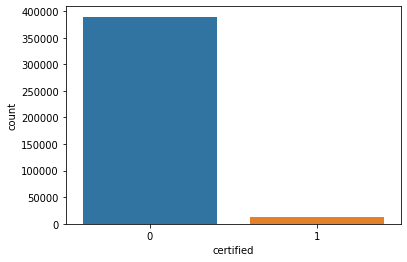

In [43]:
sb.countplot(data=hmx, x='certified');

We can see that almost 400000 students are not certified, only less than 20000 are.We will also check the proportion below to have a better understanding.

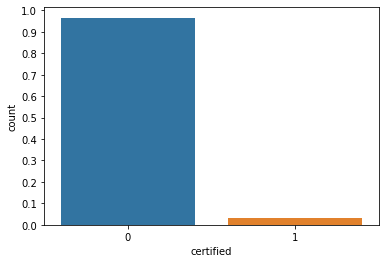

In [44]:
sb.countplot(data=hmx, x='certified')
n_records = hmx.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names);

Only as low as around 3% of the students are certified.

'grade' is a continuous variable ranges from 0 to 1, we will plot a histogram to check the distribution of this variable.

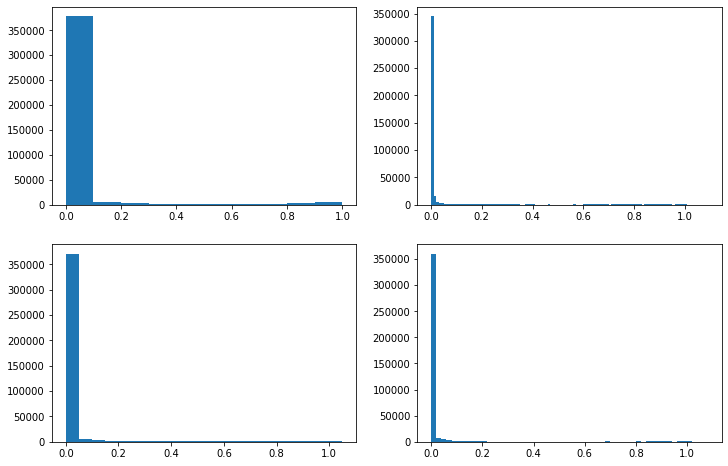

In [45]:
plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
bins = np.arange(0, 1+0.1, 0.1)
plt.hist(data=hmx, x='grade', bins=bins)

plt.subplot(2, 2, 2)
bins = np.arange(0, 1+0.1, 0.01)
plt.hist(data=hmx, x='grade', bins=bins)

plt.subplot(2, 2, 3)
bins = np.arange(0, 1+0.1, 0.05)
plt.hist(data=hmx, x='grade', bins=bins)

plt.subplot(2, 2, 4)
bins = np.arange(0, 1+0.1, 0.02)
plt.hist(data=hmx, x='grade', bins=bins);


There is a long tail of the histograms, we will apply a square root transform to see how the plots look.

In [46]:
# create a new columns with the grade values transformed in square root
hmx['grade_sqrt'] = np.sqrt(hmx['grade'])
hmx.head()

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,grade_sqrt
0,HarvardX/CS50x/2012,MHxPC130288276,0,0,0,United States,Secondary,2012,m,0.0,2013-08-30,2013-08-30,0,0,0,0,0,0.0
1,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,1987,m,0.0,2012-07-24,2012-07-24,0,0,0,0,0,0.0
2,HarvardX/CS50x/2012,MHxPC130407931,0,0,0,United States,Secondary,1968,f,0.0,2012-07-24,2012-07-24,0,0,0,0,0,0.0
3,HarvardX/PH207x/2012_Fall,MHxPC130313697,0,0,0,India,Bachelor's,1989,m,0.0,2012-07-24,2013-07-27,6,3,0,0,0,0.0
4,HarvardX/CS50x/2012,MHxPC130064950,0,0,0,Unknown/Other,Master's,1978,m,0.0,2012-07-24,2012-07-24,0,0,0,0,0,0.0


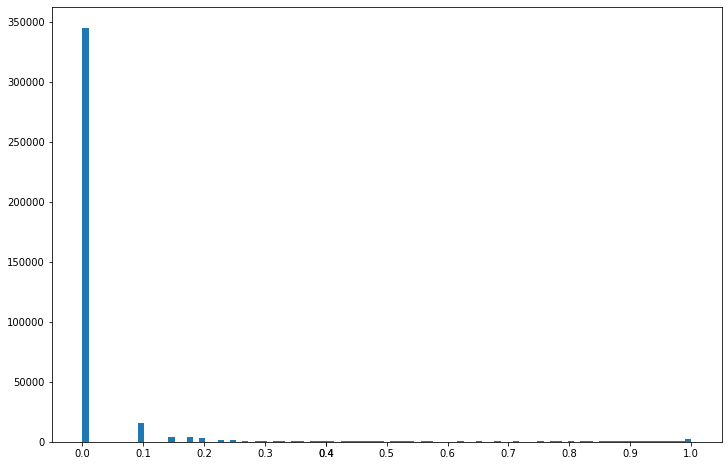

In [47]:
plt.figure(figsize=(12, 8))
ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.hist(data=hmx, x='grade_sqrt', bins=99)
plt.xticks(ticks);

That does not make too much difference, let us also try a cube root transform

In [48]:
# create a new columns with the grade values transformed in cute root
hmx['grade_cbrt'] = np.sqrt(hmx['grade'])
hmx.head()

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,grade_sqrt,grade_cbrt
0,HarvardX/CS50x/2012,MHxPC130288276,0,0,0,United States,Secondary,2012,m,0.0,2013-08-30,2013-08-30,0,0,0,0,0,0.0,0.0
1,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,1987,m,0.0,2012-07-24,2012-07-24,0,0,0,0,0,0.0,0.0
2,HarvardX/CS50x/2012,MHxPC130407931,0,0,0,United States,Secondary,1968,f,0.0,2012-07-24,2012-07-24,0,0,0,0,0,0.0,0.0
3,HarvardX/PH207x/2012_Fall,MHxPC130313697,0,0,0,India,Bachelor's,1989,m,0.0,2012-07-24,2013-07-27,6,3,0,0,0,0.0,0.0
4,HarvardX/CS50x/2012,MHxPC130064950,0,0,0,Unknown/Other,Master's,1978,m,0.0,2012-07-24,2012-07-24,0,0,0,0,0,0.0,0.0


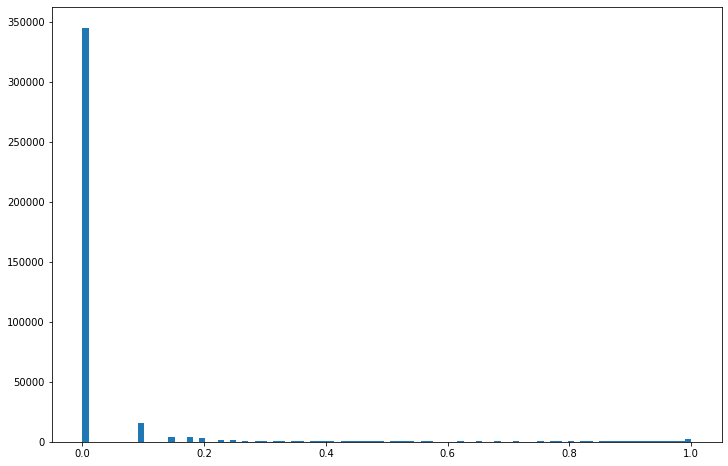

In [49]:
plt.figure(figsize=(12, 8))
plt.hist(data=hmx, x='grade_cbrt', bins=99);

A cube root transformation does not make too much differece, either. This could be because there are way too many students with the grade value 0.

After checking the variables of interest, let's also check some other variables.

In [50]:
# get the dataframe of top 10 country
by_country = hmx.groupby('final_cc_cname_DI').count()
by_country.reset_index(inplace=True)
by_country.sort_values('userid_DI', ascending=False, inplace=True)
by_country['count_proportion'] = by_country['userid_DI'] / n_records
top10 = by_country.iloc[0:9, ]

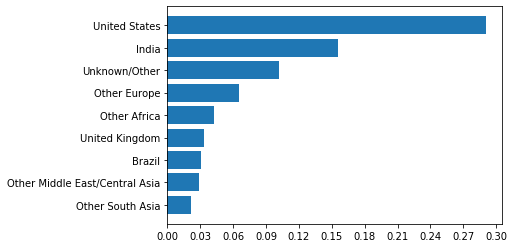

In [51]:
# bar chart of top 10 countries
ticks = np.arange(0.00, 0.30+0.01, 0.03)
plt.barh(y=top10.final_cc_cname_DI, width=top10.count_proportion)
plt.gca().invert_yaxis()
plt.xticks(ticks);

Around 30% students are from US, and about 70% are from overseas. Among those from abroad, about 15% are from India. 

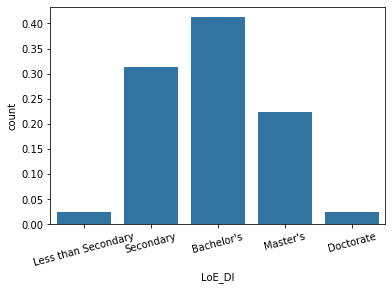

In [52]:
# Level of educatoin
n_records = hmx.shape[0]
max_value = hmx.LoE_DI.value_counts().max()
max_prop = max_value / n_records
tick_props = np.arange(0, max_prop+0.01, 0.05)
tick_names = ['{:.2f}'.format(x) for x in tick_props]

base_color = sb.color_palette()[0]
order = ['Less than Secondary','Secondary', "Bachelor's", "Master's", 'Doctorate']
sb.countplot(data=hmx, x='LoE_DI', color=base_color, order=order)
plt.xticks(rotation=15)
plt.yticks(tick_props*n_records, tick_names);

As much as 40% students hold a Bachelor's Degree, while around 20% hold a Master's, 3% hold a Doctorate Degree. That is to say, the mojority of the students have a education level of Bachelor's or higher. We are educating the well educated.

In order to get va insight of the students age, it is better to convert the year of birth to age. Since some students registered their year of birth infomation in year 2012 while some registered in year 2013, to be accurate, to get the ages of students, we had better substract the year of birth by year of registration. The year of registration can be extracted from the 'start_time_DI' variable.

In [53]:
# create age variable
hmx['start_year'] = hmx.start_time_DI.apply(lambda x: int(x[:4]))
hmx['age'] = hmx['start_year'] - hmx['YoB']
print(hmx.age.describe())
print('\n')
hmx.head(1)

count    403124.000000
mean         27.258536
std           8.866568
min           0.000000
25%          21.000000
50%          25.000000
75%          30.000000
max          82.000000
Name: age, dtype: float64




,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,...,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,grade_sqrt,grade_cbrt,start_year,age
0,HarvardX/CS50x/2012,MHxPC130288276,0,0,0,United States,Secondary,2012,m,0.0,...,2013-08-30,0,0,0,0,0,0.0,0.0,2013,1


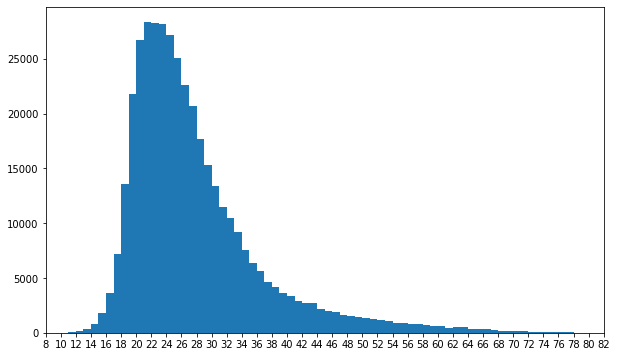

In [54]:
# distribution of age
plt.figure(figsize=(10,6))
max_age = hmx.age.max()
min_age = hmx.age.min()

bins = np.arange(0, max_age+1, 1)
ticks = np.arange(8, max_age+1, 2)
plt.hist(data=hmx, x='age', bins=bins)
plt.xticks(ticks)
plt.xlim(8, 82);

The peak appears at age 22-24. And there is a long tail at the age > 50.

Next we will look at gender variable to see the proportion of male and female

In [55]:
hmx.gender.value_counts()

m    298802
f    104322
Name: gender, dtype: int64

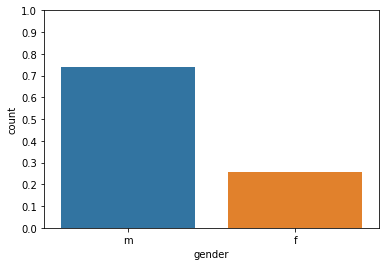

In [56]:
sb.countplot(data=hmx, x='gender')
n_records = hmx.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names);

About 75% of the students are male and only about 25% are female.

At last, we will check the distribution of the student activity variables.

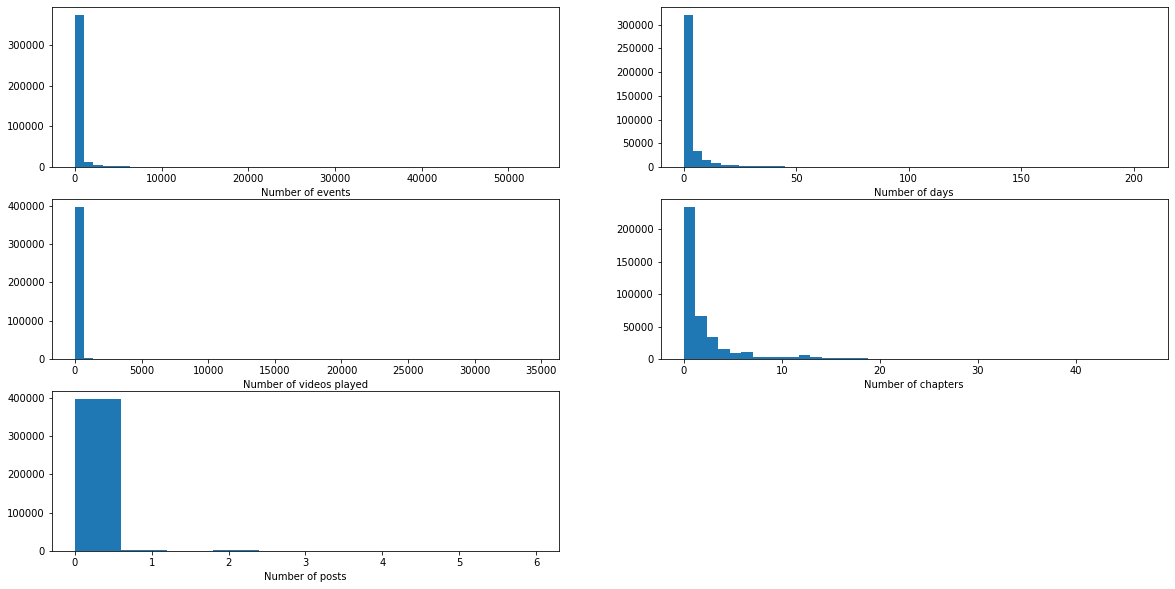

In [57]:
plt.figure(figsize=(20,10))

plt.subplot(3, 2, 1)
plt.hist(data=hmx, x='nevents', bins=50)
plt.xlabel('Number of events')

plt.subplot(3, 2, 2)
plt.hist(data=hmx, x='ndays_act', bins=50)
plt.xlabel('Number of days')

plt.subplot(3, 2, 3)
plt.hist(data=hmx, x='nplay_video', bins=50)
plt.xlabel('Number of videos played')

plt.subplot(3, 2, 4)
plt.hist(data=hmx, x='nchapters', bins=40)
plt.xlabel('Number of chapters')

plt.subplot(3, 2, 5)
plt.hist(data=hmx, x='nforum_posts')
plt.xlabel('Number of posts');

Regarding the number of activity, the majority is 0, this is not surprising based on the earlier exploration

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- certified: this variable is greatly unbalanced, nearly 97% are with a value 0.
- grade: the grade variable is seriously right skewed. We first tried a square root transformation, which does not help too much, then we tried a cute root transform, that does not change too much either. This could be because there are too many grades with a value of 0, comparatively makes it the transformation does not work well 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- country: 30% of the students are from US, about 15% are from India. It's surprising that UK and Brazil are also among the top 10 countries, with about 3% students each, while China with the largest population lags behind.
- education level: The majority of the students have a education level of bachelar's degree or high. Which is to say, we are educating the well educated through MOOCs.
- age: Since there is no column of age, we need to get this info. by subtracting year of birth with year of start. In the data cleaning section, we has to drop some records since the reported age to too small to be able to take courses, like there are 0 or 1 years old, that's unreliable. There are a few outliers of more than 80 years old, that may look not right, but we leave them as they are, we are not sure that people more than 80 years old could not be taking MOOCs. With the remained records, we see the distribution is right biased, with a peak near age 22-24, tail at age 50+.
- gender: about 75% students are male, almoast 3 times the number of female.This is a little surprising. We did nit imagine that  would be such a big gap by gender.
- activity variables: based on the exploration above, especially for certified and grade, it is not surprising that all the activity variables are right scewed, most of the values are 0.

In [58]:
hmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403124 entries, 0 to 403123
Data columns (total 21 columns):
course_id            403124 non-null object
userid_DI            403124 non-null object
viewed               403124 non-null int64
explored             403124 non-null int64
certified            403124 non-null int64
final_cc_cname_DI    403124 non-null object
LoE_DI               403124 non-null object
YoB                  403124 non-null int64
gender               403124 non-null object
grade                403124 non-null float64
start_time_DI        403124 non-null object
last_event_DI        403124 non-null object
nevents              403124 non-null int64
ndays_act            403124 non-null int64
nplay_video          403124 non-null int64
nchapters            403124 non-null int64
nforum_posts         403124 non-null int64
grade_sqrt           403124 non-null float64
grade_cbrt           403124 non-null float64
start_year           403124 non-null int64
age             

## Bivariate Exploration

Next, we will explore relationship between two variables

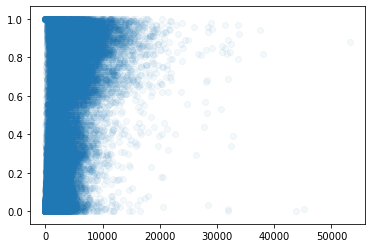

In [59]:
# scatter plot of grade VS nevents

plt.scatter(data=hmx, x='nevents', y='grade', alpha=0.05);

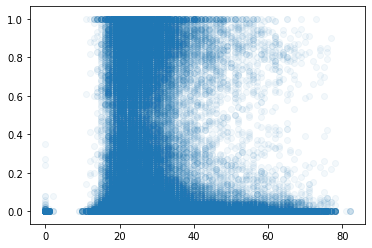

In [60]:
# scatter plot of grade VS age

plt.scatter(data=hmx, x='age', y='grade',alpha=0.05);

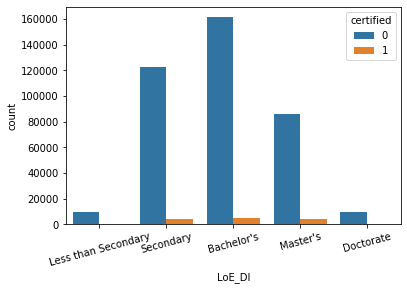

In [61]:
# certified by level of education
order = ['Less than Secondary','Secondary', "Bachelor's", "Master's", 'Doctorate']
sb.countplot(data=hmx, x='LoE_DI', hue='certified', order=order)
plt.xticks(rotation=15);

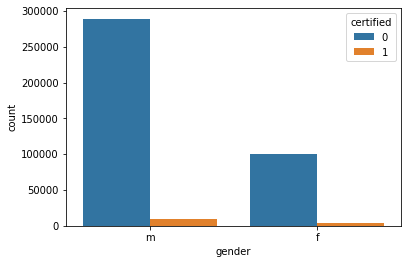

In [62]:
# certified by gender
sb.countplot(data=hmx, x='gender', hue='certified');

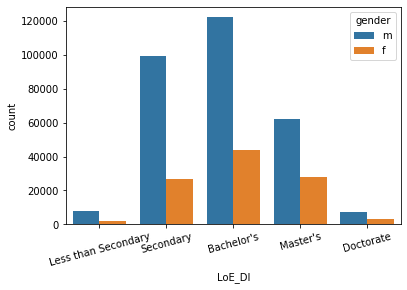

In [63]:
# gender by level of education
order = ['Less than Secondary','Secondary', "Bachelor's", "Master's", 'Doctorate']
sb.countplot(data=hmx, x='LoE_DI', hue='gender', order=order)
plt.xticks(rotation=15);

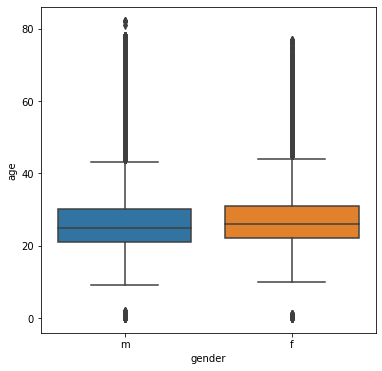

In [64]:
# boxplot of age distribution by gender
plt.figure(figsize=(6, 6))
sb.boxplot(data=hmx, x='gender', y='age');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Although it is that obvious, seems like that more nevents, the more likely the grade is higher; Students around 20-30 years old are more likely to get a higher grade.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The age of female students is a little higher than male students. 

## Multivariate Exploration


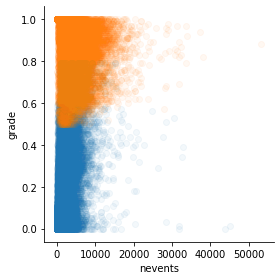

In [65]:
# scatter plot of grade VS nevents by certified
g = sb.FacetGrid(data = hmx, hue = 'certified', height=4)
g.map(plt.scatter, 'nevents', 'grade', alpha=0.05);

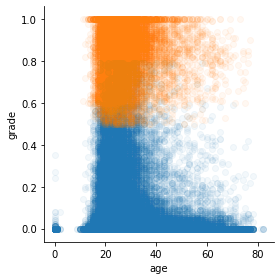

In [66]:
# scatter plot of grade VS age by certified
g = sb.FacetGrid(data = hmx, hue = 'certified', height=4)
g.map(plt.scatter, 'age', 'grade',alpha=0.05);

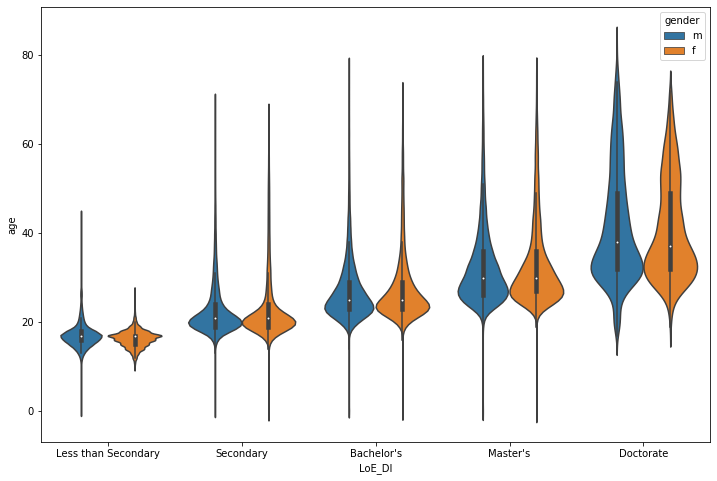

In [67]:
# Violin plot of age distribution by gender, by education level
plt.figure(figsize=(12, 8))
order = ['Less than Secondary','Secondary', "Bachelor's", "Master's", 'Doctorate']
sb.violinplot(data=hmx, x='LoE_DI', y='age', hue='gender', order=order);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In general, more nevents, 20-30 years old, grade more than 0.5 are more likely to be certified.

### Were there any interesting or surprising interactions between features?

As explored earlier, the average age of female students ia a little older than the male students, but when we break down by education level, for most of the categories, the average age is very close. Seems like that is no perticular level of education makes older female more likely to learn rather than male students.

In [68]:
# Since we created some new features, we had bette save the new dataset for further exploration
hmx.to_csv('hmx_eda.csv', index=False)